# Classifying Movie Reviews (IMDB)
#### El conjunto de datos IMDB es ampliamente utilizado en aprendizaje profundo para la clasificación de sentimientos en críticas de películas. Contiene reseñas de usuarios etiquetadas como positivas o negativas, lo que permite entrenar un modelo de clasificación binaria. Este dataset contiene:

#### - 25,000 críticas de películas para entrenamiento.
#### - 25,000 críticas de películas para prueba.
#### - Cada reseña se representa como una secuencia de enteros, donde cada número corresponde a una palabra en el vocabulario.

## Importar Librerías

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Definir el Número de Palabras a Considerar

In [10]:
# Definir la cantidad de palabras a considerar en el dataset
num_words = 10000  # Se pueden usar más o menos palabras según el caso

## Cargar el Dataset IMDB

In [11]:
from tensorflow.keras.datasets import imdb

# Cargar el conjunto de datos con el número de palabras definido
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Mostrar algunas estadísticas del dataset
print(f"Cantidad de reseñas en el conjunto de entrenamiento: {len(train_data)}")
print(f"Cantidad de reseñas en el conjunto de prueba: {len(test_data)}")

# Ver el tamaño de algunas reseñas
print(f"Longitud de la primera reseña: {len(train_data[0])}")
print(f"Longitud de la segunda reseña: {len(train_data[1])}")

Cantidad de reseñas en el conjunto de entrenamiento: 25000
Cantidad de reseñas en el conjunto de prueba: 25000
Longitud de la primera reseña: 218
Longitud de la segunda reseña: 189


## Obtener el Diccionario de Palabras

In [12]:
# Obtener el diccionario de palabras de IMDB
word_index = imdb.get_word_index()

# Ajustar índices en el diccionario
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # Palabras desconocidas
word_index["<UNUSED>"] = 3

# Invertir el diccionario para decodificar críticas
reverse_word_index = {v: k for k, v in word_index.items()}

## Preprocesamiento de Datos

In [13]:
# Función para vectorizar las secuencias
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))  # Crear una matriz de ceros
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Poner 1 en los índices de palabras presentes
    return results

# Convertir datos en representaciones binarias
x_train = vectorize_sequences(train_data, dimension=num_words)
x_test = vectorize_sequences(test_data, dimension=num_words)

# Convertir etiquetas en arreglos float32
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


## Definir y entrenar el modelo

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(num_words,)),  # Capa oculta 1
    layers.Dense(16, activation="relu"),  # Capa oculta 2
    layers.Dense(1, activation="sigmoid")  # Capa de salida para clasificación binaria
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7255 - loss: 0.6144 - val_accuracy: 0.8448 - val_loss: 0.4359
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8854 - loss: 0.3755 - val_accuracy: 0.8798 - val_loss: 0.3273
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.2751 - val_accuracy: 0.8864 - val_loss: 0.2893
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9225 - loss: 0.2175 - val_accuracy: 0.8890 - val_loss: 0.2731
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9353 - loss: 0.1884 - val_accuracy: 0.8898 - val_loss: 0.2730
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9454 - loss: 0.1639 - val_accuracy: 0.8802 - val_loss: 0.3123
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9519 - loss: 0.1445 - val_accuracy: 0.8870 - val_loss: 0.2954
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9564 - loss: 0.1296 - val_accuracy: 0.8842 - val_loss

## Evaluar el modelo

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.8717 - loss: 0.3528

Precisión en el conjunto de prueba: 0.8730
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step


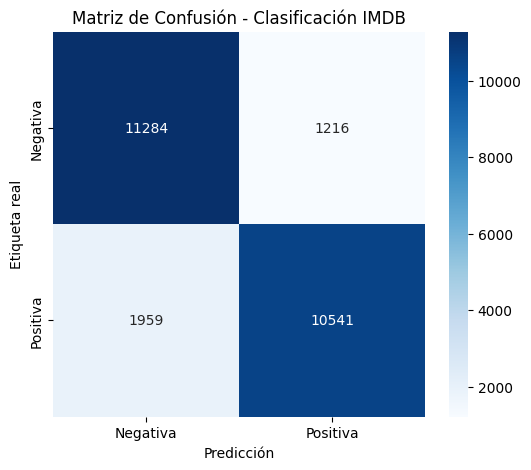

In [15]:
# Evaluar en el conjunto de prueba
results = model.evaluate(x_test, y_test)
print(f"\nPrecisión en el conjunto de prueba: {results[1]:.4f}")

# Hacer predicciones
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convertir a etiquetas binarias

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Clasificación IMDB")
plt.show()
